In [2]:
import requests
import pandas as pd
from opensustainTemplate import *

URL = "https://ost.ecosyste.ms/api/v1/projects/packages"
FILE_TO_SAVE_AS = "ecosystems_downloads.json" # the name you want to save file as


resp = requests.get(URL) # making requests to server

with open(FILE_TO_SAVE_AS, "wb") as f: # opening a file handler to create new file 
    f.write(resp.content) # writing content to file

In [3]:
df = pd.read_json(resp.content)
df

,id,name,description,url,last_synced_at,repository,owner,packages,commits,issues_stats,...,dependencies,score,created_at,updated_at,avatar_url,language,category,sub_category,project_url,html_url
0,20618,netcdf-python,The Unidata network Common Data Form (netCDF) ...,https://github.com/Unidata/netcdf4-python,2023-12-07 01:19:20.097000+00:00,"{'uuid': '15884459', 'full_name': 'Unidata/net...","{'login': 'Unidata', 'name': 'Unidata', 'uuid'...","[{'name': 'netcdf4', 'ecosystem': 'pypi', 'des...","{'full_name': 'Unidata/netcdf4-python', 'defau...","{'full_name': 'Unidata/netcdf4-python', 'html_...",...,"[{'ecosystem': 'actions', 'filepath': '.github...",25.510734,2023-09-11 14:52:14.006000+00:00,2023-12-07 01:19:20.100000+00:00,https://github.com/Unidata.png,Cython,Climate Change,Climate Data Standards,https://ost.ecosyste.ms/api/v1/projects/20618,https://ost.ecosyste.ms/projects/20618
1,19753,pvlib-python,A set of documented functions for simulating t...,https://github.com/pvlib/pvlib-python,2023-12-07 00:53:31.605000+00:00,"{'uuid': '30895522', 'full_name': 'pvlib/pvlib...","{'login': 'pvlib', 'name': 'pvlib', 'uuid': '1...","[{'name': 'pvlib', 'ecosystem': 'pypi', 'descr...","{'full_name': 'pvlib/pvlib-python', 'default_b...","{'full_name': 'pvlib/pvlib-python', 'html_url'...",...,"[{'ecosystem': 'actions', 'filepath': '.github...",24.248670,2023-09-11 14:52:06.879000+00:00,2023-12-07 00:53:31.610000+00:00,https://github.com/pvlib.png,Python,Renewable Energy,Photovoltaics and Solar Energy,https://ost.ecosyste.ms/api/v1/projects/19753,https://ost.ecosyste.ms/projects/19753
2,20183,kube-green,A k8s operator to reduce CO2 footprint of your...,https://github.com/kube-green/kube-green,2023-12-08 05:15:16.153000+00:00,"{'uuid': '340965344', 'full_name': 'kube-green...","{'login': 'kube-green', 'name': 'kube-green', ...","[{'name': 'kubegreen/kube-green', 'ecosystem':...","{'full_name': 'kube-green/kube-green', 'defaul...","{'full_name': 'kube-green/kube-green', 'html_u...",...,"[{'ecosystem': 'actions', 'filepath': '.github...",21.249127,2023-09-11 14:52:10.530000+00:00,2023-12-08 05:15:16.167000+00:00,https://github.com/kube-green.png,Go,Consumption,Computation and Communication,https://ost.ecosyste.ms/api/v1/projects/20183,https://ost.ecosyste.ms/projects/20183
3,764,eeweather,"Fetch NCDC ISD, TMY3, or CZ2010 weather data t...",https://github.com/openeemeter/eeweather,2023-12-07 00:50:29.800000+00:00,"{'uuid': '119442616', 'full_name': 'openeemete...","{'login': 'openeemeter', 'name': 'OpenEEmeter'...","[{'name': 'eeweather', 'ecosystem': 'pypi', 'd...","{'full_name': 'openeemeter/eeweather', 'defaul...","{'full_name': 'openeemeter/eeweather', 'html_u...",...,"[{'ecosystem': 'pypi', 'filepath': 'Pipfile', ...",18.043913,2023-09-11 11:54:35.868000+00:00,2023-12-07 00:50:29.813000+00:00,https://github.com/openeemeter.png,HTML,Atmosphere,Meteorological Observation and Forecast,https://ost.ecosyste.ms/api/v1/projects/764,https://ost.ecosyste.ms/projects/764
4,899,cfgrib,A Python interface to map GRIB files to the Ne...,https://github.com/ecmwf/cfgrib,2023-12-07 00:52:34.924000+00:00,"{'uuid': '141110423', 'full_name': 'ecmwf/cfgr...","{'login': 'ecmwf', 'name': 'European Centre fo...","[{'name': 'cfgrib', 'ecosystem': 'pypi', 'desc...","{'full_name': 'ecmwf/cfgrib', 'default_branch'...","{'full_name': 'ecmwf/cfgrib', 'html_url': 'htt...",...,"[{'ecosystem': 'pypi', 'filepath': 'ci/require...",20.712966,2023-09-11 11:54:36.281000+00:00,2023-12-07 00:52:34.927000+00:00,https://github.com/ecmwf.png,Python,Climate Change,Climate Data Processing and Analysis,https://ost.ecosyste.ms/api/v1/projects/899,https://ost.ecosyste.ms/projects/899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
663,686,Bergen Layered Ocean Model,"Employs an isopycnic vertical coordinate, with...",https://github.com/NorESMhub/BLOM,2023-12-07 07:09:14.413000+00:00,"{'uuid': '238252428', 'full_name': 'NorESMhub/...","{'login': 'No

In [4]:
names = []
download_counts = []
url = []
description = []
category = []
sub_category = []

for index, row in df.iterrows():
    names.append(row['name'])
    package_downloads = 0
    for package_manager in range(len(row['packages'])):
        if row['packages'][package_manager]['downloads']:
            package_downloads += row['packages'][package_manager]['downloads']  
    download_counts.append(package_downloads)
    url.append(row['url'])
    description.append(row['description'])
    category.append(row['category'])
    sub_category.append(row['sub_category'])

In [5]:
df_extract = pd.DataFrame()
df_extract['project_names'] = names
df_extract['download_counts'] = download_counts
df_extract['git_url'] = url
df_extract['description'] = description
df_extract['category'] = category
df_extract['sub_category'] = sub_category
df_extract


,project_names,download_counts,git_url,description,category,sub_category
0,netcdf-python,2010112,https://github.com/Unidata/netcdf4-python,The Unidata network Common Data Form (netCDF) ...,Climate Change,Climate Data Standards
1,pvlib-python,247853,https://github.com/pvlib/pvlib-python,A set of documented functions for simulating t...,Renewable Energy,Photovoltaics and Solar Energy
2,kube-green,233663,https://github.com/kube-green/kube-green,A k8s operator to reduce CO2 footprint of your...,Consumption,Computation and Communication
3,eeweather,116274,https://github.com/openeemeter/eeweather,"Fetch NCDC ISD, TMY3, or CZ2010 weather data t...",Atmosphere,Meteorological Observation and Forecast
4,cfgrib,97874,https://github.com/ecmwf/cfgrib,A Python interface to map GRIB files to the Ne...,Climate Change,Climate Data Processing and Analysis
...,...,...,...,...,...,...
663,Bergen Layered Ocean Model,0,https://github.com/NorESMhub/BLOM,"Employs an isopycnic vertical coordinate, with...",Hydrosphere,Ocean Circulation Models
664,OperatorFabric,0,https://github.com/opfab/operatorfabric-core,"A modular, extensible, industrial-strength and...",Energy Systems,Energy Monitoring and Management
665,The Open Energy Ontology,0,https://github.com/OpenEnergyPlatform/ontology,A domain ontology of the energy-system modelin...,Sustainable Development,Taxonomy and Ontology
666,xCDAT,0,https://github.com/xCDAT/xcdat,An extension of xarray for climate data analys...,Climate Change,Climate Data Processing and Analysis


In [6]:
import textwrap

def text_to_link(project_name, git_url):
    return '<a href="' + git_url + '" target="_blank" style = "color: black">' + str(project_name) + "</a>"

def text_to_bolt(topic):
    return "<b>" + topic + "</b>"

def line_break_text(text):
    wrapped_text = '<br>'.join(textwrap.wrap(text, 64))
    return wrapped_text
                               
df_extract["description"] = df_extract.apply(
    lambda x: line_break_text(x.description), axis=1
)                             
                               
df_extract["project_names"] = df_extract.apply(
    lambda x: text_to_bolt(x.project_names), axis=1
)
                               
df_extract["project_names"] = df_extract.apply(
    lambda x: text_to_link(x.project_names, x.git_url), axis=1
)
df_extract

,project_names,download_counts,git_url,description,category,sub_category
0,"<a href=""https://github.com/Unidata/netcdf4-py...",2010112,https://github.com/Unidata/netcdf4-python,The Unidata network Common Data Form (netCDF) ...,Climate Change,Climate Data Standards
1,"<a href=""https://github.com/pvlib/pvlib-python...",247853,https://github.com/pvlib/pvlib-python,A set of documented functions for simulating t...,Renewable Energy,Photovoltaics and Solar Energy
2,"<a href=""https://github.com/kube-green/kube-gr...",233663,https://github.com/kube-green/kube-green,A k8s operator to reduce CO2 footprint of your...,Consumption,Computation and Communication
3,"<a href=""https://github.com/openeemeter/eeweat...",116274,https://github.com/openeemeter/eeweather,"Fetch NCDC ISD, TMY3, or CZ2010 weather data t...",Atmosphere,Meteorological Observation and Forecast
4,"<a href=""https://github.com/ecmwf/cfgrib"" targ...",97874,https://github.com/ecmwf/cfgrib,A Python interface to map GRIB files to the Ne...,Climate Change,Climate Data Processing and Analysis
...,...,...,...,...,...,...
663,"<a href=""https://github.com/NorESMhub/BLOM"" ta...",0,https://github.com/NorESMhub/BLOM,"Employs an isopycnic vertical coordinate, with...",Hydrosphere,Ocean Circulation Models
664,"<a href=""https://github.com/opfab/operatorfabr...",0,https://github.com/opfab/operatorfabric-core,"A modular, extensible, industrial-strength and...",Energy Systems,Energy Monitoring and Management
665,"<a href=""https://github.com/OpenEnergyPlatform...",0,https://github.com/OpenEnergyPlatform/ontology,A domain ontology of the energy-system modelin...,Sustainable Development,Taxonomy and Ontology
666,"<a href=""https://github.com/xCDAT/xcdat"" targe...",0,https://github.com/xCDAT/xcdat,An extension of xarray for climate data analys...,Climate Change,Climate Data Processing and Analysis



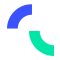

In [8]:
import numpy as np
import pandas as pd
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px

#df_extract = df_extract[df_extract["category"] == "Renewable Energy"]

top_downloaders = df_extract.nlargest(100, "download_counts")

color_discrete_sequence = px.colors.qualitative.Vivid
fig = px.bar(
    top_downloaders,
    x=top_downloaders["download_counts"],
    y=top_downloaders["project_names"],
    custom_data=["project_names", "download_counts", "git_url", "description","category","sub_category"],
    orientation="h",
    color = 'category',
    color_discrete_sequence=color_discrete_sequence,
)

fig.update_layout(
    height=2000,  # Added parameter
    #width=700,
    xaxis_title="Downloads",
    yaxis_title=None,
    title="Projects with the most downloads",
    hoverlabel=dict(bgcolor="white"),
    dragmode=False,
)

fig.add_layout_image(
    dict(
        source=logo_img,
        xref="paper",
        yref="paper",
        x=1,
        y=0,
        sizex=0.05,
        sizey=0.05,
        xanchor="right",
        yanchor="bottom",
    )
)

fig.update_traces(
    hovertemplate="<br>".join(
        [
            "Project Name: <b>%{customdata[0]}</b>",
            "Downloads: <b>%{customdata[1]}</b>",
            "Git URL: <b>%{customdata[2]}</b>",
            "Description: <b>%{customdata[3]}</b>",
            "Category: <b>%{customdata[4]}</b>",
            "Sub Category: <b>%{customdata[5]}</b>",
            "<extra></extra>"
        ]
    )
)

#fig.update(layout_showlegend=False)
fig.update_layout(hovermode="y unified",hoverdistance=1000)

config = {
  'toImageButtonOptions': {
    'format': 'svg', # one of png, svg, jpeg, webp
  },
  'responsive':'true'
}

fig["layout"]["yaxis"]["autorange"] = "reversed"

#fig.update_layout(barmode='stack', xaxis={'categoryorder':'total ascending'})
fig.update_layout(yaxis_categoryorder = 'total descending', xaxis_range = [0,250000])
fig.show(config=config)
